# 1. About this analysis

This analysis is part of my bachelor's degree thesis on the topic: "Analysis and segmentation of innovative development of the Russian Federation using multivariate statistics methods."

The purpose of the work is to analyze innovative development in Russia and identify the features of regional groups of the Russian Federation according to innovation factors.

The dataset is collected by me from Rosstat and Rospatent for 2022. It includes following relative variables:
- region: name of 85 regions in Russia
- ind1: percentage of costs for innovation activities of goods shipped, work performed, services
- ind2: average salary of an employee working in R&D
- ind3: percentage of innovative goods, works, services in the total volume of goods shipped, works performed, services
- ind4: level of innovative activity of organizations
- ind5: percentage of organizations carrying out technological innovations in the total number of organizations surveyed
- ind6: percentage of employees of organizations performing R&D in the total number of employees in the region
- ind7: percentage of researchers with an academic degree in the total number of employed in the region
- ind8: inventive activity coefficient
- ind9: profitability of production (volume of innovative production/costs for innovation activities)
- ind10: share of higher education students in the total population
- ind11: labor productivity in R&D (volume of innovative production/Number of employees of organizations performing R&D)
- ind12: share of R&D costs in GRP

# 2. Analysis conducting

## 2.1. Import library and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats
from scipy.stats import kstest, anderson
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm

In [2]:
import sklearn
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from pyclustertend import hopkins, vat, ivat

In [3]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer

In [4]:
df = pd.read_csv('85_oblast_2022.csv', delimiter=';', header=0)
df.head()

,region,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,ind10,ind11,ind12
0,Белгородская область,1.744114,1.018136e+06,10.268738,15.130941,25.592417,0.186097,0.046461,1.52,5.887653,3.087258,108.479703,2.076830
1,Брянская область,0.451585,5.542260e+05,5.128477,12.094395,18.309859,0.073237,0.009266,0.34,11.356615,1.943258,61.928687,0.407979
2,Владимирская область,0.965551,5.217317e+05,3.554800,9.867173,21.813725,0.618340,0.048771,0.96,3.681628,1.812693,6.586866,0.985230
3,Воронежская область,1.837747,4.949327e+05,3.475353,10.436714,18.329939,0.965645,0.080981,1.56,1.891094,3.786789,3.367355,1.427110
4,Ивановская область,0.250566,8.317272e+05,3.728244,13.756614,22.222222,0.117289,0.047075,0.62,14.879306,2.510063,16.979652,0.184333


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  85 non-null     object 
 1   ind1    85 non-null     float64
 2   ind2    83 non-null     float64
 3   ind3    85 non-null     float64
 4   ind4    85 non-null     float64
 5   ind5    85 non-null     float64
 6   ind6    83 non-null     float64
 7   ind7    81 non-null     float64
 8   ind8    85 non-null     float64
 9   ind9    73 non-null     float64
 10  ind10   85 non-null     float64
 11  ind11   76 non-null     float64
 12  ind12   78 non-null     float64
dtypes: float64(12), object(1)
memory usage: 8.8+ KB


In [6]:
# rows with missing data
df[df.isna().sum(axis=1) > 0]

,region,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,ind10,ind11,ind12
20,Ненецкий автономный округ,0.002528,9.235963e+05,0.055025,2.247191,4.477612,0.119931,NaN,0.00,NaN,0.000000,12.779663,NaN
21,Архангельская область,0.291341,1.254260e+06,2.901160,5.163728,13.063063,0.200367,NaN,0.63,NaN,1.792454,14.968532,NaN
30,Республика Калмыкия,0.223509,5.507927e+05,0.268913,2.666667,11.764706,0.121690,0.037877,0.61,NaN,3.316155,NaN,NaN
36,г. Севастополь,2.761878,7.789301e+05,3.830725,7.758621,16.326531,0.448459,0.117829,0.94,NaN,2.559590,NaN,NaN
38,Республика Ингушетия,0.023142,3.988373e+05,0.538387,1.115242,12.000000,0.080168,0.025877,0.00,NaN,1.494965,NaN,NaN
40,Карачаево-Черкесская Республика,0.005039,6.093943e+05,0.444169,4.285714,17.391304,0.315825,0.076657,0.13,NaN,2.253344,0.456949,NaN
41,Республика Северная Осетия - Алания,0.127692,6.008052e+05,0.853139,2.903226,8.045977,0.192375,0.052725,1.02,NaN,2.932935,0.938388,NaN
42,Чеченская Республика,0.155146,6.708952e+05,0.084044,1.985560,8.139535,0.060683,0.019826,0.15,NaN,2.326653,NaN,0.053307
65,Республика Тыва,0.149695,7.250102e+05,0.141356,2.953586,9.090909,0.311745,0.063377,0.09,NaN,1.778116,NaN,0.068526
66,Республика Хакасия,0.050288,1.231226e+06,0.106238,4.337349,9.774436,0.044620,0.022310,0.36,NaN,1.430934,NaN,0.061749


In [7]:
# fill in missing data using KNN-Imputation
imputer = KNNImputer(n_neighbors=10 )
df.iloc[:,1:] = imputer.fit_transform(df.iloc[:,1:]) 

## 2.2. Exploratory Data Analysis

In [8]:
df.describe().apply(lambda x: round(x, 2))

,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,ind10,ind11,ind12
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,1.54,820742.33,4.37,9.43,18.89,0.49,0.08,0.84,4.64,2.33,20.82,1.41
std,1.67,309719.07,4.37,5.02,7.70,0.57,0.09,0.68,5.74,1.07,26.85,1.47
min,0.00,398837.34,0.06,1.12,4.48,0.02,0.01,0.00,0.03,0.00,0.31,0.05
25%,0.38,574159.30,0.67,5.97,14.25,0.15,0.03,0.43,1.61,1.75,4.75,0.41
50%,1.03,801834.31,3.48,9.33,18.31,0.27,0.05,0.75,3.42,2.25,12.02,0.91
75%,1.98,931219.41,6.21,11.97,22.73,0.58,0.08,1.00,5.89,2.85,22.12,1.77
max,8.81,2086448.46,21.77,32.01,47.28,2.94,0.53,4.09,41.15,6.24,145.04,6.37


In [9]:
stats.skew(df.iloc[:,1:], axis=0, bias=True)

array([1.94460377, 1.69509376, 1.4930698 , 1.43076689, 1.13823395,
       2.45235141, 3.07802605, 2.26973238, 3.9482499 , 1.02293306,
       2.50751942, 1.83274704])

We see that the distances between minimum and maximum values in all columns are very large, and their level of skewness is really high.

In [10]:
# minimum/maximum range
minimum = list(round(df.iloc[:, 1:].min(axis=0),2))
maximum = list(round(df.iloc[:, 1:].max(axis=0),2))

pd.DataFrame({'column': df.columns[1:],'minimum':minimum, 'maximum':maximum})

,column,minimum,maximum
0,ind1,0.00,8.81
1,ind2,398837.34,2086448.46
2,ind3,0.06,21.77
3,ind4,1.12,32.01
4,ind5,4.48,47.28
5,ind6,0.02,2.94
6,ind7,0.01,0.53
7,ind8,0.00,4.09
8,ind9,0.03,41.15
9,ind10,0.00,6.24


In [11]:
# outliers detection
outlier_tab = pd.DataFrame(columns = ['column','lower_range', 'upper_range', 'outlier_rows'])
lower_range = []
upper_range = []
def outlier_detection(column):
    m = 1.5
    per25 = df[column].quantile(0.25)
    per75 = df[column].quantile(0.75)
    iqr = per75 - per25
    lower = per25 - m*iqr
    if lower < 0:
        lower = 0
    else:
        lower
    upper = per75 + m*iqr
    index = np.where((df[column] > upper) | (df[column] < lower))[0]
    return lower, upper, index

for column in df.columns[1:]:
    lower, upper, index = outlier_detection(column)
    lower_range.append(lower)
    upper_range.append(upper)
    outlier_tab = pd.concat([outlier_tab, pd.DataFrame.from_records([{'column':column,
                                                                        'lower_range': lower,
                                                                        'upper_range':upper,
                                                                        'outlier_rows':index}])])
    
outlier_tab

,column,lower_range,upper_range,outlier_rows
0,ind1,0,4.379194e+00,"[47, 52, 69, 74, 79]"
0,ind2,38569.151364,1.466810e+06,"[60, 61, 62]"
0,ind3,0,1.452726e+01,"[25, 46, 47]"
0,ind4,0,2.097920e+01,"[35, 47]"
0,ind5,1.534925,3.545349e+01,"[35, 47]"
0,ind6,0,1.229213e+00,"[5, 9, 17, 28, 52, 71, 73]"
0,ind7,0,1.618689e-01,"[9, 17, 28, 71, 73, 75, 81]"
0,ind8,0,1.855000e+00,"[17, 28, 47, 71, 73]"
0,ind9,0,1.231187e+01,"[4, 25, 29, 46, 48]"
0,ind10,0.09685,4.503916e+00,"[17, 20, 28, 61, 73]"


In [12]:
df.iloc[[0, 1, 8, 25, 45, 46, 47, 53, 79],:]  # outliers rows in column 11

,region,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,ind10,ind11,ind12
0,Белгородская область,1.744114,1.018136e+06,10.268738,15.130941,25.592417,0.186097,0.046461,1.52,5.887653,3.087258,108.479703,2.076830
1,Брянская область,0.451585,5.542260e+05,5.128477,12.094395,18.309859,0.073237,0.009266,0.34,11.356615,1.943258,61.928687,0.407979
8,Липецкая область,3.435347,8.325624e+05,3.431277,12.086331,21.276596,0.101158,0.038370,0.36,0.998815,1.615613,73.858519,5.409625
25,Мурманская область,0.375330,1.127391e+06,15.446305,10.334789,19.704433,0.507172,0.111077,0.53,41.153906,1.036453,101.955121,0.410648
45,Республика Марий Эл,1.058078,5.815483e+05,6.938860,11.594203,23.357664,0.055934,0.013823,0.75,6.557988,2.542946,86.614498,0.877162
46,Республика Мордовия,1.704978,4.744609e+05,21.765517,17.472119,33.673469,0.227928,0.018377,0.84,12.765862,3.201542,97.741601,2.134086
47,Республика Татарстан,5.128025,7.117424e+05,18.979538,32.006633,46.025105,0.719582,0.077465,1.88,3.701140,3.597007,67.145616,6.177579
53,Оренбургская область,1.294806,8.227468e+05,7.627474,6.987578,13.777778,0.095457,0.022824,0.58,5.890826,2.223762,145.043566,1.330309
79,Хабаровский край,6.370700,8.696797e+05,10.443558,7.746479,15.966387,0.218698,0.080389,0.71,1.639311,2.993029,50.352743,4.311619


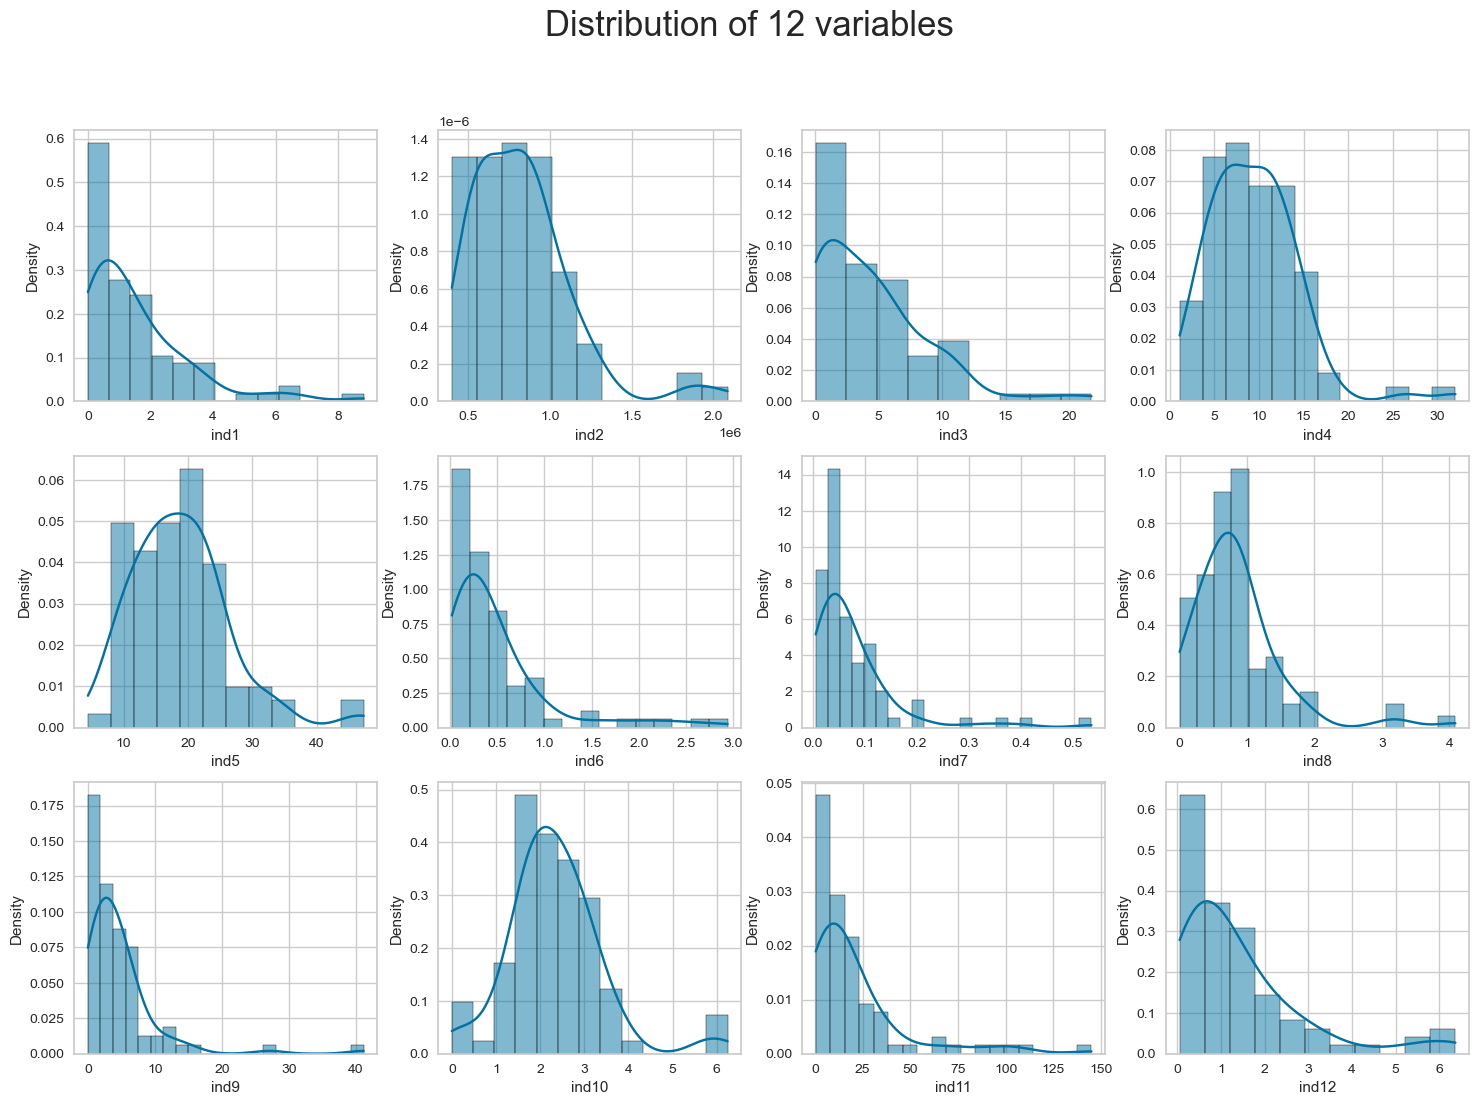

In [13]:
fig, ax = plt.subplots(ncols= 4, nrows = 3, figsize = (18,12))
for i, col in enumerate(df.columns[1:]):
    n_row = i//4
    n_column = i%4
    sns.histplot(df[col], kde = True, ax = ax[n_row,n_column], stat = 'density')
plt.suptitle('Distribution of 12 variables', size = 25)
plt.show()

In [14]:
def information(col):
    fig, ax = plt.subplots(ncols= 2, nrows = 1, figsize = (8,3))
    sns.histplot(df[col], kde = True, ax = ax[0], stat = 'density')
    ax[0].set_xlabel(xlabel = None)
    ax[0].set_ylabel(ylabel = 'density')
    ax[1].boxplot(df[col])
    ax[1].set_xlabel(xlabel = None)
    ax[1].set_xticks(ax[1].set_xticks([]),labels = None)
    plt.suptitle('Distribution of variable X' + col[3:])
    plt.show()
    
    select = ['region',col]
    max_df = df.nlargest(3, columns = col, keep='first')[select]
    min_df = df.nsmallest(3, columns = col, keep='first')[select]
    print('-------------------------regions with the highest value------------------------')
    print(max_df)
    print('-------------------------regions with the lowest value------------------------')
    print(min_df)
    print('---------------------------outlier--------------------------')
    print(outlier_tab[outlier_tab['column'] == col]) 

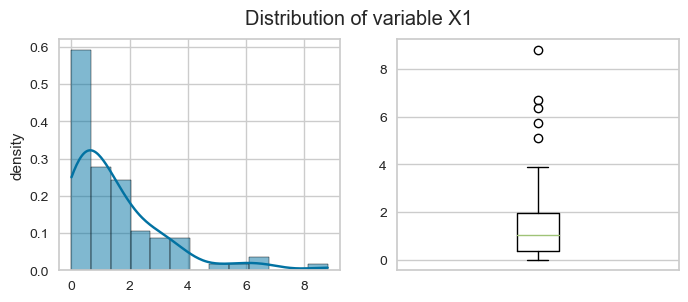

-------------------------regions with the highest value------------------------
                   region      ind1
74     Республика Бурятия  8.806585
52  Нижегородская область  6.695407
79       Хабаровский край  6.370700
-------------------------regions with the lowest value------------------------
                             region      ind1
20        Ненецкий автономный округ  0.002528
40  Карачаево-Черкесская Республика  0.005039
38             Республика Ингушетия  0.023142
---------------------------outlier--------------------------
  column lower_range  upper_range          outlier_rows
0   ind1           0     4.379194  [47, 52, 69, 74, 79]


In [15]:
information('ind1') # we can use this function to see details for each variable

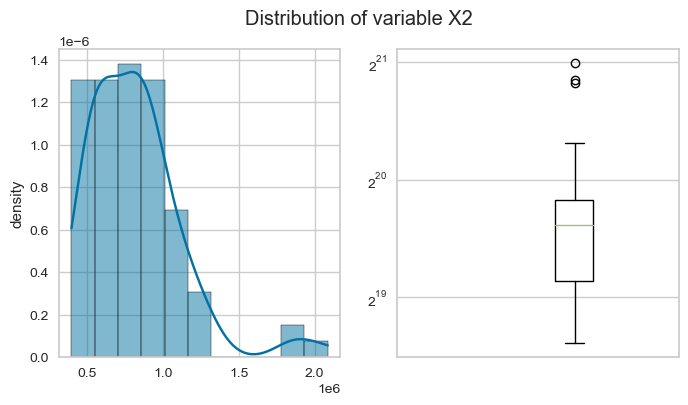

-------------------------regions with the highest value------------------------
                                      region          ind2
61           Ямало-Ненецкий автономный округ  2.086448e+06
62                         Тюменская область  1.886662e+06
60  Ханты-Мансийский автономный округ - Югра  1.860156e+06
-------------------------regions with the lowest value------------------------
                  region           ind2
38  Республика Ингушетия  398837.341772
58    Курганская область  408613.043478
46   Республика Мордовия  474460.942408
------------------outlier-----------------
  column   lower_range   upper_range  outlier_rows
0   ind2  38569.151364  1.466810e+06  [60, 61, 62]


In [16]:
fig, ax = plt.subplots(ncols= 2, nrows = 1, figsize = (8,4))

sns.histplot(df['ind2'], kde = True, ax = ax[0], stat = 'density')
ax[0].set_xlabel(xlabel = None)
ax[0].set_ylabel(ylabel = 'density')

ax[1].set_xscale('log', base=2)
ax[1].boxplot(df['ind2'])
ax[1].set_xlabel(xlabel = None)
ax[1].set_yscale('log', base=2)
ax[1].set_xticks(ax[1].set_xticks([]),labels = None)

plt.suptitle('Distribution of variable X' + 'ind2'[-1])
plt.show()
    
select = ['region','ind2']
max_df = df.nlargest(3, columns = 'ind2', keep='first')[select]
min_df = df.nsmallest(3, columns = 'ind2', keep='first')[select]
print('-------------------------regions with the highest value------------------------')
print(max_df)
print('-------------------------regions with the lowest value------------------------')
print(min_df)
print('------------------outlier-----------------')
print(outlier_tab[outlier_tab['column'] == 'ind2']) 

In [17]:
# Kolmogorov-Smirnov test
for col in (df.columns[1:]):
    if df[col].isna().sum() > 0:
        column = df[col].dropna()
    else:
        column = df[col]
    p_val = round(kstest(column, 'norm')[1],3)
    if p_val >= 0.05:
        print(f'Column {col} has P-value = {p_val} >= 0.05, so distribution of {col} is normal')
    else:
        print(f'Column {col} has P-value = {p_val} < 0.05, so distribution of {col} is NOT normal')

Column ind1 has P-value = 0.0 < 0.05, so distribution of ind1 is NOT normal
Column ind2 has P-value = 0.0 < 0.05, so distribution of ind2 is NOT normal
Column ind3 has P-value = 0.0 < 0.05, so distribution of ind3 is NOT normal
Column ind4 has P-value = 0.0 < 0.05, so distribution of ind4 is NOT normal
Column ind5 has P-value = 0.0 < 0.05, so distribution of ind5 is NOT normal
Column ind6 has P-value = 0.0 < 0.05, so distribution of ind6 is NOT normal
Column ind7 has P-value = 0.0 < 0.05, so distribution of ind7 is NOT normal
Column ind8 has P-value = 0.0 < 0.05, so distribution of ind8 is NOT normal
Column ind9 has P-value = 0.0 < 0.05, so distribution of ind9 is NOT normal
Column ind10 has P-value = 0.0 < 0.05, so distribution of ind10 is NOT normal
Column ind11 has P-value = 0.0 < 0.05, so distribution of ind11 is NOT normal
Column ind12 has P-value = 0.0 < 0.05, so distribution of ind12 is NOT normal


In [18]:
# Test for distribution
choices = ['norm','expon','logistic','gumbel_l','gumbel_r']
for col in (df.columns[1:]):
    column = df[col]
    for choice in choices:
        result = anderson(column, dist = choice)
        bigger = result.statistic > result.critical_values[2]
        if bigger == False:
            print(f'Column {col} has distribution: {choice}') 

Column ind1 has distribution: expon
Column ind4 has distribution: logistic
Column ind4 has distribution: gumbel_r
Column ind5 has distribution: logistic
Column ind5 has distribution: gumbel_r
Column ind6 has distribution: expon


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Column ind8 has distribution: gumbel_r
Column ind9 has distribution: expon
Column ind10 has distribution: logistic
Column ind12 has distribution: expon


<Axes: >

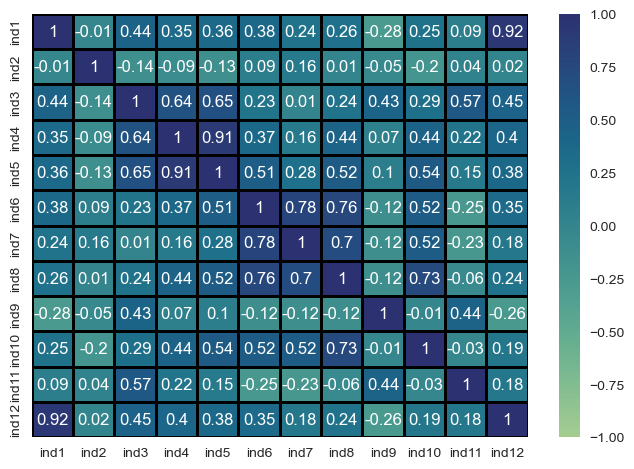

In [19]:
correl = pd.DataFrame(df.iloc[:, 1:].corr()).apply(lambda x: round(x, 2))
sns.heatmap(correl, cmap='crest', annot=True, vmin=-1, vmax=1, center= 0, linewidths=1, linecolor='black')

In [20]:
column_select = ['ind1', 'ind3', 'ind4', 'ind5', 'ind6', 'ind7', 'ind8', 'ind9', 'ind10', 'ind11', 'ind12'] #because variable 'ind2' is not good for factor analysis
X = df[column_select]
colX = X.columns

In [21]:
standard = StandardScaler(with_mean=True, with_std= True) # standardize dataset
X_standard = standard.fit_transform(X)

In [22]:
X_standard.mean(axis = 0).round()

array([-0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0., -0.])

## 2.3. Dimension reduction

### 2.3.1. Using PCA

In [23]:
def pca_reduction(n_comp, X, index_name):
    '''
    Input:
    - n_comp: number estimated factors
    - X: data
    - index_name: column names of X
    Output: Eigen value, Ration explain, Cumulative ratio explain.
    '''
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    print('Eigen value')
    print(pca.explained_variance_)
    print('--------------------------------------------------')
    print('Ratio explain')
    print(pca.explained_variance_ratio_)
    print('--------------------------------------------------')
    print('Cumulative ratio explain:\n', np.sum(pca.explained_variance_ratio_))
    
    pc_name = []
    for i in range(1, n_comp+1):
        pc_name.append(f'PC{i}')
    result = pd.DataFrame(pca.components_.T, columns = pc_name)
    result.index = index_name
    return result

In [24]:
pca_reduction(n_comp=4, X = X_standard, index_name = colX)

Eigen value
[4.58756931 2.38970996 1.66326225 0.865353  ]
--------------------------------------------------
Ratio explain
[0.41214526 0.21469052 0.14942677 0.07774294]
--------------------------------------------------
Cumulative ratio explain:
 0.8540054966571984


,PC1,PC2,PC3,PC4
ind1,0.299498,0.057300,0.545828,0.200495
ind3,0.293427,0.448372,-0.044525,0.097254
ind4,0.356896,0.223744,-0.072353,-0.514598
ind5,0.388793,0.162740,-0.129993,-0.432297
ind6,0.359818,-0.288634,-0.091087,0.179666
ind7,0.281842,-0.374345,-0.164830,0.390900
ind8,0.365255,-0.242085,-0.218764,0.099837
ind9,-0.020656,0.378482,-0.472808,0.369600
ind10,0.335619,-0.137655,-0.251627,-0.031281
ind11,0.054477,0.512987,-0.059172,0.370990


### 2.3.2. Using Factor Analysis with rotation 'varimax'

In [25]:
def bartlett_sphericity_test(X):
    chi_square_value, p_value = calculate_bartlett_sphericity(X)
    print(f'Chi-square value: {chi_square_value}\nP-value: {p_value}')
    if p_value < 0.05:
        print('The matrix of population correlations is not equal to I => Can use factor analysis')
    else:
        print('Quality of data is not good for factor analysis') 
            
def kmo_test(X):
    kmo_per_variable , kmo_total = calculate_kmo(X)
    print(f'KMO Model: {kmo_total}')
    if kmo_total > 0.6:
        print('Quality of data is good for factor analysis')
    else:
        print('Quality of data is not good for factor analysis')
            
def FA_conduct(X, n_factor, rotation, index_name):
    
    #fit model
    fa = FactorAnalyzer(n_factors=n_factor, rotation=rotation)
    model = fa.fit(X)
    
    # model loadings
    factor_name = []
    for i in range(1, n_factor+1):
        factor_name.append(f'F{i}')
    factor_loading = pd.DataFrame(model.loadings_, columns = factor_name).apply(lambda x: round(x,2))
    factor_loading.index = index_name
    print(f'Factor loadings:\n{factor_loading}')
    
    #variance table
    variance, proportional_variance, cumulative_variances = model.get_factor_variance()
    factor = range(1, n_factor+1)
    variance_result = pd.DataFrame(columns = ['factor','variance', 'proportional_variance', 'cumulative_variances'])
    for i in range(n_factor):
        variance_result = pd.concat([variance_result, 
                                    pd.DataFrame.from_records([{'factor':factor[i],
                                                                'variance':variance[i],
                                                                'proportional_variance': proportional_variance[i],
                                                                'cumulative_variances': cumulative_variances[i]}
                                                                ])],
                                    ignore_index=True)
    print(f'Variance result:\n{variance_result}')
        
    ev = model.get_eigenvalues()
    plt.scatter(range(1,len(ev[0])+1),ev[0])
    plt.plot(range(1,len(ev[0])+1),ev[0])
    plt.title('Scree plot')
    plt.xlabel('Factor number')
    plt.ylabel('Eigenvalue')
    plt.grid(visible = True)
    plt.xticks(range(1,len(ev[0])+1))
    plt.show()

def FA_fit_transform(X, n_factor, rotation):
    fa = FactorAnalyzer(n_factors=n_factor, rotation=rotation)
    X_new = fa.fit_transform(X)
    return X_new

In [26]:
# evaluate quality of dataset for factor analysis
print('-------Bartlett Sphericity Test--------')
bartlett_sphericity_test(X_standard)
print('----------------KMO Test---------------')
kmo_test(X_standard)

-------Bartlett Sphericity Test--------
Chi-square value: 762.5830756046895
P-value: 3.3297122201207097e-125
The matrix of population correlations is not equal to I => Can use factor analysis
----------------KMO Test---------------
KMO Model: 0.7101850705494606
Quality of data is good for factor analysis


Factor loadings:
         F1    F2    F3    F4
ind1   0.19  0.92  0.15 -0.00
ind3   0.12  0.35  0.47  0.74
ind4   0.21  0.20  0.88  0.18
ind5   0.35  0.17  0.86  0.18
ind6   0.83  0.21  0.20 -0.11
ind7   0.87  0.09 -0.03 -0.12
ind8   0.83  0.09  0.29 -0.03
ind9  -0.03 -0.30  0.02  0.71
ind10  0.63  0.06  0.35  0.04
ind11 -0.19  0.14  0.12  0.67
ind12  0.12  0.94  0.20  0.04
Variance result:
  factor  variance  proportional_variance  cumulative_variances
0      1  2.805962               0.255087              0.255087
1      2  2.109147               0.191741              0.446828
2      3  2.063804               0.187619              0.634447
3      4  1.593595               0.144872              0.779319


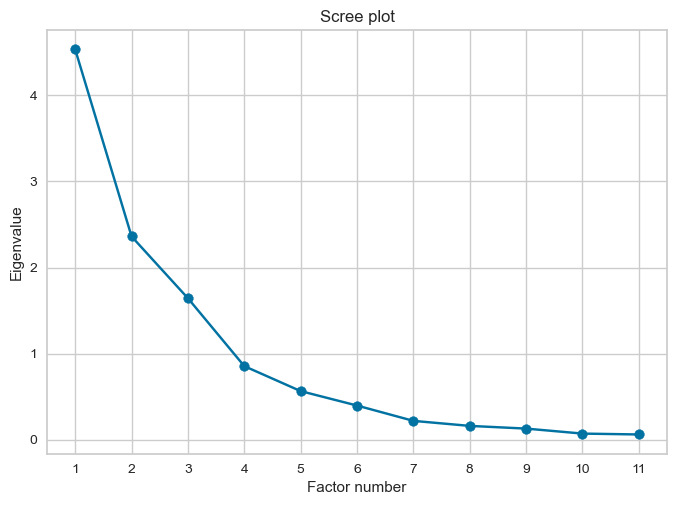

In [27]:
FA_conduct(X_standard, n_factor = 4, rotation = 'varimax', index_name = colX)

In [28]:
X_new = FA_fit_transform(X=X_standard, n_factor=4, rotation='varimax')
data_reduce = pd.DataFrame(X_new, columns = ['factor1', 'factor2','factor3', 'factor4'])
data_reduce

,factor1,factor2,factor3,factor4
0,-0.021219,0.129328,0.930166,1.356591
1,-0.792691,-0.736124,0.353789,0.618121
2,-0.032436,-0.378637,0.476753,-0.389204
3,0.671178,-0.007128,-0.008623,-0.527795
4,-0.388876,-0.997781,0.833195,0.203338
...,...,...,...,...
80,-0.439575,-0.315681,-0.743362,-0.664337
81,0.339760,-0.986694,0.137916,-0.754156
82,-0.863557,1.691709,-1.153249,-1.077174
83,-0.332550,-0.648828,-0.675329,-0.506491


## 2.4. Clustering (PAM algorithm)

In [29]:
hopkins(data_reduce, sampling_size = len(data_reduce))

0.2435415994697653

Text(0.5, 0.98, 'Silhouette method for PAM algorithm')

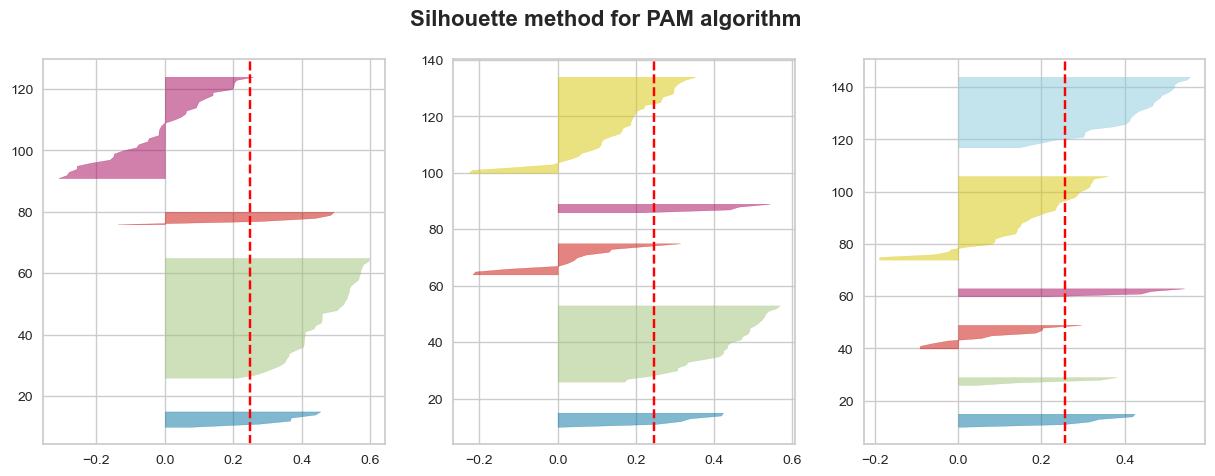

In [30]:
# Silhouette method for determining the number of clusters
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i in range(4,7):
    km = KMedoids(n_clusters=i, metric='euclidean', method='pam', max_iter=300, random_state=42)
    column = i%4
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[column])
    visualizer.fit(X_new) 

fig.suptitle('Silhouette method for PAM algorithm', fontsize = 16, fontweight = 'bold')

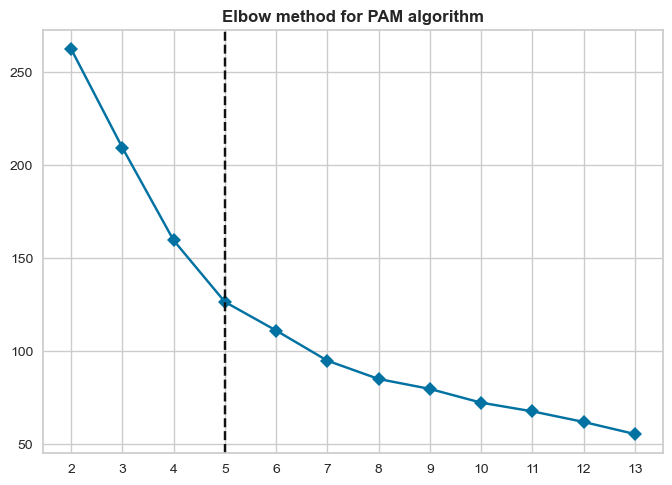

In [31]:
# Elbow method for determining the number of clusters
model = KMedoids(n_clusters=i, metric='euclidean', method='pam', max_iter=300, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,14), metric='distortion', timings=False, locate_elbow = True)

visualizer.fit(X_new)        
plt.title('Elbow method for PAM algorithm', fontsize = 12, fontweight = 'bold')
plt.xticks(range(2,14))
plt.show()  

In [32]:
pam = KMedoids(n_clusters=5, metric='euclidean', init = 'random',  method='pam', max_iter=100, random_state=296)
pam.fit(X_new)
data_reduce['label_pam'] = pam.labels_
data_reduce['label_pam'].value_counts()

1    35
3    28
4    12
2     6
0     4
Name: label_pam, dtype: int64

In [33]:
# function for calculation the coefficient of variation
def coef_var(label):
    df_label = data_reduce[data_reduce['label_pam'] == label]
    df_variance = df_label.describe().iloc[1:3,:4].T.apply(lambda x: round(x,2))
    df_variance['coefficient of variation'] = round(df_variance['std']/df_variance['mean'], 2)
    return df_variance 

In [34]:
coef_var(0)

,mean,std,coefficient of variation
factor1,3.61,1.19,0.33
factor2,-0.02,0.66,-33.00
factor3,0.08,0.65,8.12
factor4,-0.38,0.47,-1.24


In [35]:
coef_var(1)

,mean,std,coefficient of variation
factor1,-0.03,0.52,-17.33
factor2,-0.33,0.57,-1.73
factor3,0.53,0.77,1.45
factor4,-0.37,0.44,-1.19


In [36]:
coef_var(2)

,mean,std,coefficient of variation
factor1,-0.31,0.70,-2.26
factor2,2.77,0.85,0.31
factor3,-0.60,0.81,-1.35
factor4,-0.28,0.89,-3.18


In [37]:
coef_var(3)

,mean,std,coefficient of variation
factor1,-0.34,0.34,-1.00
factor2,-0.20,0.44,-2.20
factor3,-0.76,0.38,-0.50
factor4,-0.18,0.37,-2.06


In [38]:
coef_var(4)

,mean,std,coefficient of variation
factor1,-0.15,0.30,-2.00
factor2,0.05,0.93,18.60
factor3,0.50,1.27,2.54
factor4,1.77,1.15,0.65


In [39]:
# Test Kruskal-Wallis's for checking difference in median in each group
p_val = []
factor = ['factor1', 'factor2', 'factor3', 'factor4']
for col in factor:
    var0 = data_reduce[col][data_reduce['label_pam'] == 0].to_list()
    var1 = data_reduce[col][data_reduce['label_pam'] == 1].to_list()
    var2 = data_reduce[col][data_reduce['label_pam'] == 2].to_list()
    var3 = data_reduce[col][data_reduce['label_pam'] == 3].to_list()
    var4 = data_reduce[col][data_reduce['label_pam'] == 4].to_list()
    stat, p_value = stats.kruskal(var0, var1, var2,var3, var4)
    p_val.append(round(p_value, 2))

print('P-values of the Kruskal-Wallis test for each factor:')    
p_val

P-values of the Kruskal-Wallis test for each factor:


[0.0, 0.0, 0.0, 0.0]

# 3. Analysis result

In [40]:
#data_reduce['cluster_display_pam'] =  data_reduce['label_pam'].apply(lambda x: x+1)

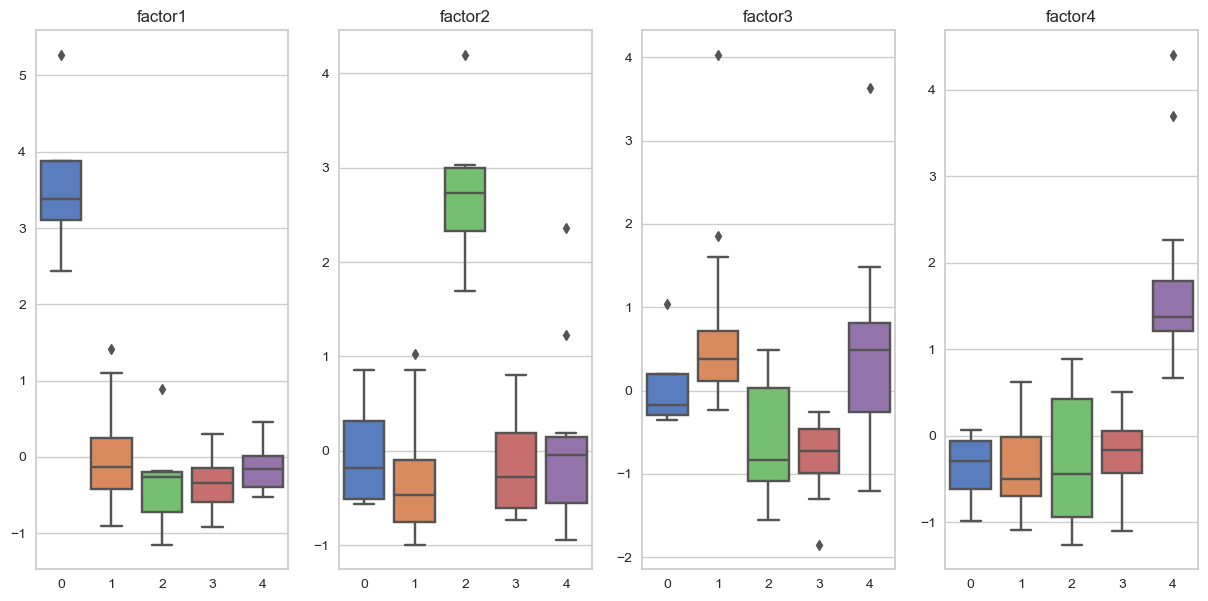

In [41]:
name_pc = data_reduce.columns[:4]
fig, ax = plt.subplots(nrows = 1, ncols=4, figsize = (15,7))
for i, name in enumerate(name_pc):
    column =  i%4
    sns.boxplot(data=data_reduce, x='label_pam', y= name, ax = ax[column], palette='muted')
    ax[column].set(title = name)
    ax[column].set_xlabel(xlabel = None) 
    ax[column].set_ylabel(ylabel = None)
plt.show()

From the above figure we can draw some conclusions:
- Group 0 is characterized by high human innovation potential;
- Group 2 is characterized by high costs of innovation;
- Group 4 is characterized by high production efficiency;
- Groups 1 and 3 do not have typical factors like the other groups, however, when comparing these two groups with each other, it is clear that group 1 has a higher level of investment in innovation than the level of group 3, and its human potential also tends to be somewhat higher, than in group 3.

In [42]:
data_reduce['region'] = df['region']

In [43]:
gr0 = data_reduce[data_reduce['label_pam'] == 0]
gr0.iloc[:,-1].tolist()

['г. Москва', 'г. Санкт-Петербург', 'Новосибирская область', 'Томская область']

In [44]:
gr1 = data_reduce[data_reduce['label_pam'] == 1]
gr1.iloc[:,-1].tolist()

['Брянская область',
 'Владимирская область',
 'Воронежская область',
 'Ивановская область',
 'Калужская область',
 'Московская область',
 'Орловская область',
 'Рязанская область',
 'Тверская область',
 'Ярославская область',
 'Республика Коми',
 'Вологодская область',
 'Псковская область',
 'Республика Крым',
 'Астраханская область',
 'Ростовская область',
 'Кабардино-Балкарская Республика',
 'Республика Башкортостан',
 'Чувашская Республика',
 'Пермский край',
 'Кировская область',
 'Пензенская область',
 'Самарская область',
 'Саратовская область',
 'Ульяновская область',
 'Курганская область',
 'Свердловская область',
 'Тюменская область',
 'Алтайский край',
 'Кемеровская область- Кузбасс',
 'Омская область',
 'Республика Саха (Якутия)',
 'Камчатский край',
 'Приморский край',
 'Магаданская область']

In [45]:
gr2 = data_reduce[data_reduce['label_pam'] == 2]
gr2.iloc[:,-1].tolist()

['Липецкая область',
 'Нижегородская область',
 'Иркутская область',
 'Республика Бурятия',
 'Хабаровский край',
 'Сахалинская область']

In [46]:
gr3 = data_reduce[data_reduce['label_pam'] == 3]
gr3.iloc[:,-1].tolist()

['Костромская область',
 'Курская область',
 'Смоленская область',
 'Тамбовская область',
 'Республика Карелия',
 'Ненецкий автономный округ',
 'Архангельская область',
 'Калинингpадская область',
 'Ленинградская область',
 'Республика Калмыкия',
 'Краснодарский край',
 'Волгоградская область',
 'г. Севастополь',
 'Республика Дагестан',
 'Республика Ингушетия',
 'Карачаево-Черкесская Республика',
 'Республика Северная Осетия - Алания',
 'Чеченская Республика ',
 'Ханты-Мансийский автономный округ - Югра',
 'Ямало-Ненецкий автономный округ',
 'Республика Алтай ',
 'Республика Тыва',
 'Республика Хакасия',
 'Красноярский край',
 'Забайкальский край',
 'Амурская область',
 'Еврейская автономная область',
 'Чукотский автономный округ']

In [47]:
gr4 = data_reduce[data_reduce['label_pam'] == 4]
gr4.iloc[:,-1].tolist()

['Белгородская область',
 'Тульская область',
 'Мурманская область',
 'Новгородская область',
 'Республика Адыгея',
 'Ставропольский край',
 'Республика Марий Эл',
 'Республика Мордовия',
 'Республика Татарстан',
 'Удмуртская Республика',
 'Оренбургская область',
 'Челябинская область']